54.76664648910412


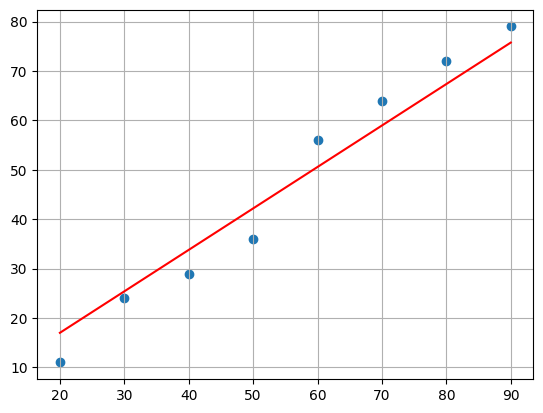

In [4]:
import matplotlib.pyplot as plt
from typing import Callable
import numpy as np

#data
luminocity   = np.array([20, 30, 40, 50, 60, 70, 80, 90])
plant_growth = np.array([11, 24, 29, 36, 56, 64, 72, 79])

#factory for linear regression in the form of a lambda function
def linear_predictor(X: np.ndarray, Y: np.ndarray) -> Callable:
	assert(len(X) == len(Y))
	X_sum = X.sum()
	Y_sum = Y.sum()
	n = len(X)
	a = ( (X * Y).sum() - X_sum * Y_sum ) / ( (X ** 2).sum() - X_sum ** 2 )
	b = (1/n) * Y_sum - a * (1/n) * X_sum
	return lambda x: a * x + b

#creates the regression
predictor_function = linear_predictor(
	luminocity,
	plant_growth
)

#uses our regression lambda function
print(predictor_function(65))

# Out: 54.76664648910412
plt.scatter(luminocity, plant_growth)
plt.grid(True)

line_x = np.linspace(20, 90)
line_y = predictor_function(line_x)

plt.plot(line_x, line_y, c="r")

plt.show()

[quadratic regression](https://www.varsitytutors.com/hotmath/hotmath_help/topics/quadratic-regression#:~:text=A%20quadratic%20regression%20is%20the,c%20where%20a%E2%89%A00%20.)

[[1.10714286 1.         0.57142857]]


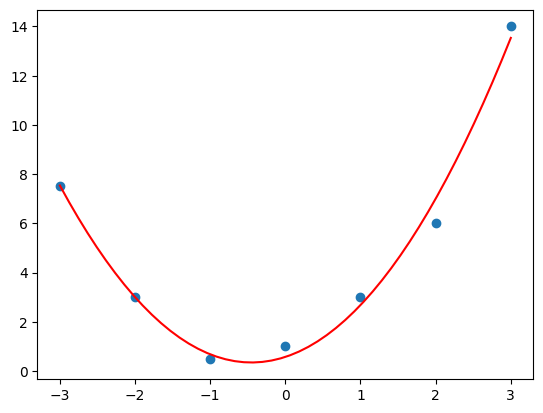

In [12]:
# https://www.varsitytutors.com/hotmath/hotmath_help/topics/quadratic-regression#:~:text=A%20quadratic%20regression%20is%20the,c%20where%20a%E2%89%A00%20.

import matplotlib.pyplot as plt
from typing import Callable
import numpy as np

vals = np.array([(-3,7.5),(-2,3),(-1,0.5),(0,1),(1,3),(2,6),(3,14)])
x_vals, y_vals = vals[...,0], vals[...,1]

def quadratic_predictor(X: np.ndarray, Y: np.ndarray) -> Callable:
    assert len(X) == len(Y)
    N = len(X)

    X4_sum = (X ** 4).sum()
    X3_sum = (X ** 3).sum()
    X2_sum = (X ** 2).sum()
    X_sum  = X.sum()
    X2Y_sum= (X**2 * Y).sum()
    XY_sum = (X * Y).sum()
    Y_sum  = Y.sum()

    # HV = U where V = [a, b, c] so V = UH^-1

    M_inv = np.linalg.inv(np.matrix([
        [X4_sum, X3_sum, X2_sum],
        [X3_sum, X2_sum, X_sum ],
        [X2_sum, X_sum,  N     ]
    ]))

    U = np.array([
        X2Y_sum,
        XY_sum,
        Y_sum
    ])

    V = U * M_inv
    print(V)
    a, b, c = V[0,0], V[0,1], V[0,2]

    return lambda x: a * x**2 + b * x + c

quadratic_function = quadratic_predictor(x_vals, y_vals)

plt.scatter(x_vals, y_vals)
x_line = np.linspace(-3, 3)
y_line = quadratic_function(x_line)
plt.plot(x_line, y_line, c="r")
plt.show()

[Polynomial Regression](https://en.wikipedia.org/wiki/Polynomial_regression)

[Vandermonde Matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix)

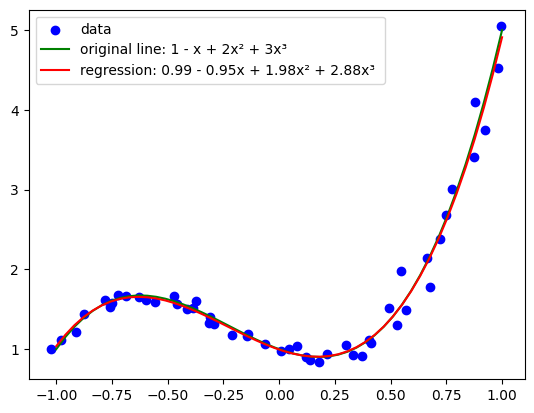

In [52]:
# ~~ SOURCES ~~
# polynomial regression: https://en.wikipedia.org/wiki/Polynomial_regression
# Vandermonde Matrix: https://en.wikipedia.org/wiki/Vandermonde_matrix
# Superscript formatting:
#   https://www.geeksforgeeks.org/how-to-print-superscript-and-subscript-in-python/

import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

fp = "/home/luke/Documents/Work/ML/polynomial_data.csv"
data = np.genfromtxt(fp, delimiter=',')
data_x, data_y = data[..., 0], data[..., 1]


def regression_with_vals(X: np.ndarray, Y: np.ndarray, M: int) -> (Callable, np.ndarray):
    assert len(X) == len(Y)
    assert len(X) >= M

    # Vandermonde matrix
    V = np.matrix([
        [xi ** m for m in range(M)]
        for xi in X
    ])

    V_tra = V.transpose()

    # beta polynomial variables
    B = np.array((np.linalg.inv(V_tra * V) * V_tra).dot(Y))[0]

    # clossure function for regression line
    def function(x: int | float | np.ndarray) -> float | np.ndarray:
        if type(x) != np.ndarray:
            return float((np.array([x**m for m in range(M)]).dot(B)).sum())
        return np.array([
            (np.array([val**m for m in range(M)]).dot(B)).sum()
            for val in x
        ])

    return (function, B)


def regression_vals(X: np.ndarray, Y: np.ndarray, M: int) -> np.ndarray:
    _, vals = regression_with_vals(X, Y, M)
    return vals


def regression(X: np.ndarray, Y: np.ndarray, M: int) -> Callable:
    function, _ = regression_with_vals(X, Y, M)
    return function


def get_super(x: str) -> str:
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)


def regression_equation_string(X: np.ndarray) -> str:
    string = ""
    for i, xi in enumerate(X):
        if i == 0:
            string += "{0:.2f} ".format(xi)
            continue

        sign = "-" if xi < 0 else "+"

        if i == 1:
            string += "{0} {1:.2f}x ".format(sign, np.abs(xi))
            continue

        string += "{0} {1:.2f}x{2} ".format(sign, xi, get_super(str(i)))

    return string


polynomial, vals = regression_with_vals(data_x, data_y, 4)
line_equation = regression_equation_string(vals)
line_x = np.linspace(-1.0, 1.0, 50)
line_y = polynomial(line_x)
original_line_y = (lambda x: 3 * x**3 + 2 * x**2 - x + 1)(line_x)

plt.scatter(data_x, data_y, c="b", label="data")
plt.plot(line_x, original_line_y, c="g",
         label="original line: 1 - x + 2x² + 3x³")
plt.plot(line_x, line_y, c="r", label=f"regression: {line_equation}")
plt.legend(loc="upper left")
plt.show()